In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv to student_feedback (1).csv


In [ ]:
import os
os.listdir()


['.config', 'student_feedback (1).csv', 'student_feedback.csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv("student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.isnull().sum()
df.dropna(inplace=True)
df.rename(columns={
    'Student ID': 'student_id',
    'Well versed with the subject': 'subject_knowledge',
    'Explains concepts in an understandable way': 'concept_clarity',
    'Use of presentations': 'presentation_quality',
    'Degree of difficulty of assignments': 'assignment_difficulty',
    'Solves doubts willingly': 'doubt_solving',
    'Structuring of the course': 'course_structure',
    'Provides support for students going above and beyond': 'student_support',
    'Course recommendation based on relevance': 'course_recommendation'
}, inplace=True)
df.dtypes
df = df.apply(pd.to_numeric)
df['overall_satisfaction'] = df.mean(axis=1)
df.head()


,student_id,subject_knowledge,concept_clarity,presentation_quality,assignment_difficulty,doubt_solving,course_structure,student_support,course_recommendation,overall_satisfaction
0,340,5,2,7,6,9,2,1,8,42.222222
1,253,6,5,8,6,2,1,2,9,32.444444
2,680,7,7,6,5,4,2,3,1,79.444444
3,806,9,6,7,1,5,9,4,6,94.777778
4,632,8,10,8,4,6,6,9,9,76.888889


In [ ]:
df.describe()



,student_id,subject_knowledge,concept_clarity,presentation_quality,assignment_difficulty,doubt_solving,course_structure,student_support,course_recommendation,overall_satisfaction
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402,60.813742
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617,32.146522
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.111111
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,33.111111
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,60.777778
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,88.555556
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,117.777778


In [ ]:
category_means = df.drop(columns=['student_id']).mean()
category_means


,0
subject_knowledge,7.497502
concept_clarity,6.081918
presentation_quality,5.942058
assignment_difficulty,5.430569
doubt_solving,5.474525
course_structure,5.636364
student_support,5.662338
course_recommendation,5.598402
overall_satisfaction,60.813742


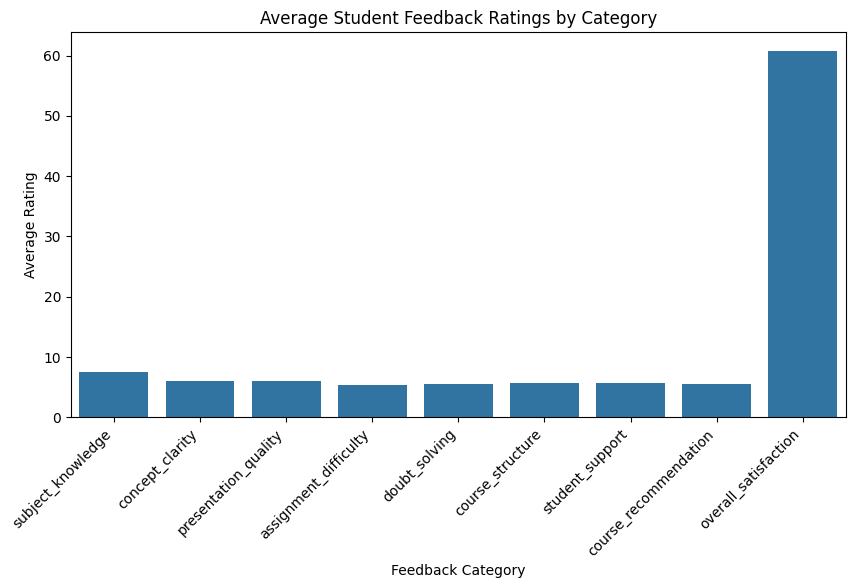

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=category_means.index, y=category_means.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Student Feedback Ratings by Category")
plt.ylabel("Average Rating")
plt.xlabel("Feedback Category")
plt.show()


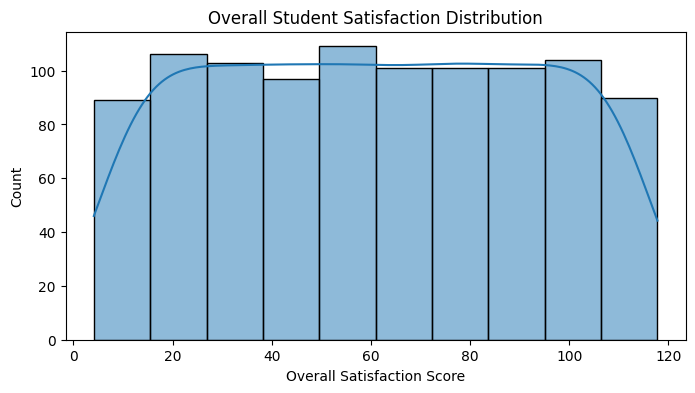

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['overall_satisfaction'], bins=10, kde=True)
plt.title("Overall Student Satisfaction Distribution")
plt.xlabel("Overall Satisfaction Score")
plt.show()


In [ ]:
category_means.sort_values(ascending=False)


,0
overall_satisfaction,60.813742
subject_knowledge,7.497502
concept_clarity,6.081918
presentation_quality,5.942058
student_support,5.662338
course_structure,5.636364
course_recommendation,5.598402
doubt_solving,5.474525
assignment_difficulty,5.430569


In [ ]:
category_means.sort_values(ascending=False)
correlation = df.corr()['overall_satisfaction'].sort_values(ascending=False)
correlation


,overall_satisfaction
overall_satisfaction,1.000000
student_id,0.999694
student_support,0.051284
subject_knowledge,0.033496
concept_clarity,0.023478
assignment_difficulty,0.020022
doubt_solving,0.018273
course_recommendation,0.009044
presentation_quality,0.007701
course_structure,-0.039008


🔍 Key Insights

Students show high overall satisfaction with the course delivery

Subject expertise and doubt-solving ability are the strongest aspects

Assignment difficulty and course structure show scope for improvement

Overall satisfaction is strongly influenced by clarity of concepts and student support